In [70]:
%load_ext autoreload
%autoreload 2

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import json

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load a simple 4D example of preprocessed data

In [4]:
nifti_mrs_file = 'svs_preprocessed.nii.gz';

### Load using the nibabel interface

In [8]:
img = nib.load(nifti_mrs_file)

### Examine data
Complex data type must be specified.

In [14]:
data = img.get_fdata(dtype=np.complex64)
print(f'Data shape = {data.shape}')

Data shape = (1, 1, 1, 4096)


Data is stored in the time-domain. Plot the absolute and real component.

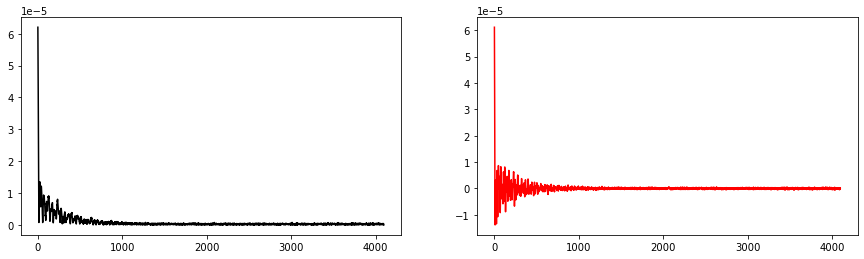

In [96]:
fig,axes = plt.subplots(1,2,figsize=(15,4))
axes[0].plot(np.abs(data[0,0,0,:]),color='k')
axes[1].plot(np.real(data[0,0,0,:]),color='r')
plt.savefig('plots/data.png')

### Examine NIfTI header


In [52]:
header = img.header
print(f'intent_name: {header.get_intent()[2]}')
print(f'Position information: \n {header.get_best_affine()}\n')

dwelltime = header['pixdim'][4]
print(f'Dwelltime: {dwelltime} s\n')

print(header)

intent_name: mrs_v0_2
Position information: 
 [[ 20.          -0.          -0.         -32.90067836]
 [ -0.         -20.          -0.          10.6633755 ]
 [  0.           0.         -20.          21.35589036]
 [  0.           0.           0.           1.        ]]

Dwelltime: 8.33e-05 s

<class 'nibabel.nifti2.Nifti2Header'> object, endian='<'
sizeof_hdr      : 540
magic           : b'n+2'
eol_check       : [13 10 26 10]
datatype        : complex64
bitpix          : 64
dim             : [   4    1    1    1 4096    1    1    1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
pixdim          : [1.00e+00 2.00e+01 2.00e+01 2.00e+01 8.33e-05 1.00e+00 1.00e+00 1.00e+00]
vox_offset      : 0
scl_slope       : nan
scl_inter       : nan
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
slice_start     : 0
slice_end       : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 

### Examine NIfTI MRS header extension

In [71]:
hdr_ext_codes = img.header.extensions.get_codes()
mrs_hdr_ext = json.loads(img.header.extensions[hdr_ext_codes.index(44)].get_content())
mrs_hdr_ext

{'SpectrometerFrequency': [297.219948],
 'ResonantNucleus': ['1H'],
 'EchoTime': 0.011,
 'RepetitionTime': 5.0,
 'InversionTime': None,
 'MixingTime': 0.032,
 'ConversionMethod': 'Manual',
 'ConversionTime': '2020-12-16T17:14:47.920',
 'OriginalFile': ['meas_MID310_STEAM_metab_FID115673.dat']}

### Plot spectrum on frequency and ppm axis

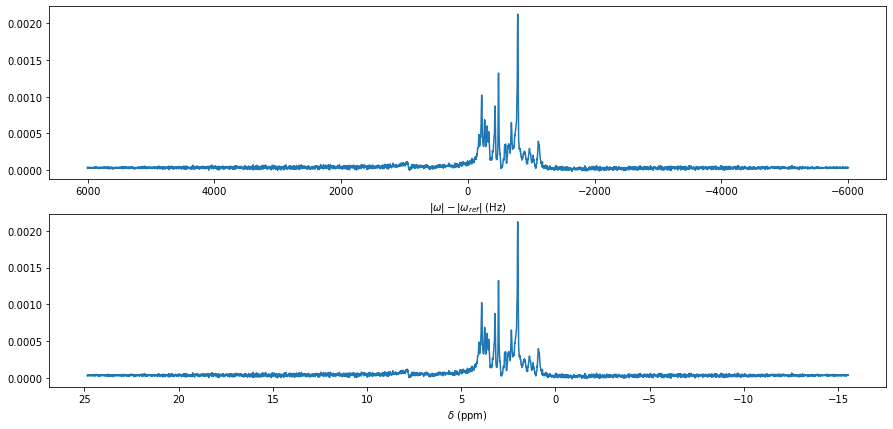

In [95]:
spectrometer_frequency = mrs_hdr_ext['SpectrometerFrequency'][0]
bandwidth = 1/dwelltime
frequency_axis = np.linspace(bandwidth/2, -bandwidth/2, data.shape[3])
ppm_axis = 4.65+frequency_axis/spectrometer_frequency

spectrum = np.fft.fftshift(np.fft.fft(data[0,0,0,:]))

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,7))
ax1.plot(frequency_axis,np.real(spectrum))
ax2.plot(ppm_axis,np.real(spectrum))

ax1.invert_xaxis()
ax2.invert_xaxis()

ax1.set_xlabel('$|\omega|-|\omega_{ref}|$ (Hz)')
ax2.set_xlabel('$\delta$ (ppm)')

plt.savefig('plots/spectra.png')

## Load more complex SVS example

In [98]:
nifti_mrs_file_2 = 'svs_suppressed.nii.gz';
img2 = nib.load(nifti_mrs_file_2)

print(f'Data shape: {img2.get_fdata(dtype=np.complex64).shape}')

Data shape: (1, 1, 1, 4096, 32, 64)


Use header extension to find out what the higher dimensions are used for

In [99]:
hdr_ext_codes = img2.header.extensions.get_codes()
mrs_hdr_ext2 = json.loads(img2.header.extensions[hdr_ext_codes.index(44)].get_content())
mrs_hdr_ext2

{'dim_5': 'DIM_COIL',
 'dim_6': 'DIM_DYN',
 'dim_6_use': 'Signal repetitions',
 'SpectrometerFrequency': [297.219948],
 'ResonantNucleus': ['1H'],
 'EchoTime': 0.011,
 'RepetitionTime': 5.0,
 'InversionTime': None,
 'MixingTime': 0.032,
 'ConversionMethod': 'Manual',
 'ConversionTime': '2020-12-16T17:14:47.920',
 'OriginalFile': ['meas_MID310_STEAM_metab_FID115673.dat'],
 'siemens_sequence_info': {'Description': 'Paths to sequence and reconstruction code binaries for sequence identification.',
  'sequence': '%CustomerSeq%\\uzay_steam_gui',
  'recon': '%CustomerIceProgs%\\uzayIcePrgSpecOnline'}}